In [238]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

#Expensive Visualization Method Outline --------------------------------------------------------------------------

#Establish Domain and n points within
    
#Use shell commands to Modify & Run FENN at each x and y "point"

#Pull parameters from FENN simulation log

#Compute the Cost Function

#Interpolate between points

#Plots

file_path = "/home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt"

'''
COMP = "g++ Networks.cpp -o FENN \
-I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
-I/usr/include/eigen3 \
-L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
-lhdf5_cpp -lhdf5"
'''

'\nCOMP = "g++ Networks.cpp -o FENN -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include -I/usr/include/eigen3 -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib -lhdf5_cpp -lhdf5"\n'

In [239]:
#Establish domain

EpsA_range=(1.0e-02, 1.0e-06)#Hi to Low
EpsR_range=(1.0e-02, 1.0e-06)

EpsA_points = []
EpsR_points = []

#tune accuracy - bigger n is more accurate
n = 1000

EpsA_step = (max(EpsA_range)-min(EpsA_range))/n
EpsR_step = (max(EpsR_range)-min(EpsR_range))/n

for i in range(n):

    EpsA_points.append(min(EpsA_range)+(i*EpsA_step))
    EpsR_points.append(min(EpsR_range)+(i*EpsR_step))
    
print(EpsA_points) #USE TO PLOT
print(EpsR_points)


[1e-06, 1.0999000000000001e-05, 2.0998e-05, 3.0997e-05, 4.0996e-05, 5.0994999999999995e-05, 6.0994e-05, 7.0993e-05, 8.0992e-05, 9.0991e-05, 0.00010099, 0.000110989, 0.000120988, 0.000130987, 0.000140986, 0.000150985, 0.000160984, 0.000170983, 0.000180982, 0.000190981, 0.00020098, 0.000210979, 0.000220978, 0.000230977, 0.000240976, 0.000250975, 0.000260974, 0.00027097300000000004, 0.00028097200000000005, 0.00029097100000000006, 0.00030097, 0.000310969, 0.00032096800000000003, 0.00033096700000000005, 0.00034096600000000006, 0.000350965, 0.000360964, 0.00037096300000000003, 0.00038096200000000004, 0.00039096100000000005, 0.00040096, 0.000410959, 0.00042095800000000003, 0.00043095700000000004, 0.00044095600000000005, 0.00045095500000000006, 0.000460954, 0.00047095300000000003, 0.00048095200000000004, 0.000490951, 0.00050095, 0.000510949, 0.000520948, 0.000530947, 0.000540946, 0.0005509450000000001, 0.0005609440000000001, 0.0005709430000000001, 0.0005809420000000001, 0.000590941, 0.00060094

In [240]:
#Initialize
t_array = [None] * n
ERR_array = [None] * n

#Shell Commands

#Change working directory!

os.chdir('/home/ojc/Downloads/UTKCAP/FENN')

#Modify FENN

for i in range(n):
    
#Fix python -> C++ array bug
    EpsA_value = EpsA_points[i]
    EpsR_value = EpsR_points[i]
    
    !sed -i "s/double EpsA = [0-9.e+-]*;/double EpsA = {EpsA_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp
    !sed -i "s/double EpsR = [0-9.e+-]*;/double EpsR = {EpsR_value};/" /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp

#Compile FENN
    
    !g++ /home/ojc/Downloads/UTKCAP/FENN/Networks.cpp -o FENN \
        -I/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/include \
        -I/usr/include/eigen3 \
        -L/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -Wl,-rpath,/home/ojc/anaconda3/pkgs/hdf5-1.10.6-h3ffc7dd_1/lib \
        -lhdf5_cpp -lhdf5
    
    !rm -f /home/ojc/Downloads/UTKCAP/FENN/simulation_log.txt
    
    !./FENN > /dev/null 2>&1
    
    '''!ls /home/ojc/Downloads/UTKCAP/FENN'''
    
#Read from simulation_log.txt
    
    with open(file_path, 'r') as file:
        for line in file:
            if "Wall-clock time:" in line:
                t_array[i] = line.split(":")[1].strip() 
            if "Accumulated Error:" in line:
                ERR_array[i] = line.split(":")[1].strip() 
                
    '''print(f'Iteration {i}: Time = {t_array[i]}, Error = {ERR_array[i]}')'''

print(t_array) #USE TO PLOT
print(ERR_array)

['2008644 microseconds', '795875 microseconds', '2258324 microseconds', '817070 microseconds', '700628 microseconds', '676774 microseconds', '658040 microseconds', '655251 microseconds', '640345 microseconds', '653771 microseconds', '1024365 microseconds', '675758 microseconds', '758653 microseconds', '707596 microseconds', '673502 microseconds', '627112 microseconds', '687089 microseconds', '733485 microseconds', '641216 microseconds', '840818 microseconds', '614383 microseconds', '625633 microseconds', '1113838 microseconds', '585428 microseconds', '574436 microseconds', '766373 microseconds', '1740828 microseconds', '594156 microseconds', '590590 microseconds', '591544 microseconds', '585747 microseconds', '609590 microseconds', '1745873 microseconds', '591895 microseconds', '581788 microseconds', '569081 microseconds', '883696 microseconds', '735198 microseconds', '1203098 microseconds', '1092019 microseconds', '1016875 microseconds', '1737743 microseconds', '2009494 microseconds',

['0.0728388', '0.300175', '0.494394', '0.683349', '0.871865', '1.06025', '1.24726', '1.43482', '1.62293', '1.8068', '1.98928', '2.18021', '2.35943', '2.55055', '2.73006', '2.91539', '3.09829', '3.28995', '3.48053', '3.66945', '3.84439', '4.03093', '4.21623', '4.40059', '4.58362', '4.76585', '4.96372', '5.14373', '5.32255', '5.50038', '5.69655', '5.87274', '6.04723', '6.24244', '6.41472', '6.60955', '6.78031', '6.97436', '7.16804', '7.36205', '7.52978', '7.69621', '7.88852', '8.08151', '8.24511', '8.43688', '8.62898', '8.82069', '8.98146', '9.17267', '9.36403', '9.55534', '9.71232', '9.90282', '10.0933', '10.2836', '10.4742', '10.6647', '10.8552', '11.0069', '11.1971', '11.387', '11.5769', '11.7671', '11.9152', '12.1048', '12.294', '12.4833', '12.6728', '12.8624', '13.0516', '13.2409', '13.4304', '13.5717', '13.7605', '13.9492', '14.1379', '14.3269', '14.5157', '14.7043', '14.893', '15.0816', '15.2705', '15.4045', '15.5927', '15.7807', '15.9688', '16.1569', '16.345', '16.5331', '16.7213

In [241]:
#Fixing time units

for i in range(n):
    t_value = t_array[i]
    
    if isinstance(t_value, float):
        continue  
    
    value, unit = t_value.split()
    
    if unit == 'microseconds':
        unit = 1.0e-6
    else:
        print('error in time units')
    
    value = float(value)
    t_array[i] = value * unit

print(t_array)

ERR_array = [float(x) for x in ERR_array]

print(ERR_array)

[2.008644, 0.795875, 2.258324, 0.81707, 0.7006279999999999, 0.676774, 0.65804, 0.6552509999999999, 0.6403449999999999, 0.653771, 1.024365, 0.675758, 0.7586529999999999, 0.707596, 0.6735019999999999, 0.627112, 0.687089, 0.7334849999999999, 0.641216, 0.840818, 0.614383, 0.625633, 1.1138379999999999, 0.585428, 0.574436, 0.766373, 1.7408279999999998, 0.594156, 0.59059, 0.591544, 0.585747, 0.60959, 1.745873, 0.591895, 0.581788, 0.569081, 0.8836959999999999, 0.735198, 1.203098, 1.0920189999999999, 1.016875, 1.7377429999999998, 2.009494, 0.8951129999999999, 0.765694, 1.664615, 0.88495, 0.8671789999999999, 1.784142, 0.9119419999999999, 0.570032, 0.570079, 0.5688409999999999, 0.5835009999999999, 0.8786879999999999, 1.796036, 1.649451, 0.5683039999999999, 0.563566, 0.5716359999999999, 1.164679, 0.566075, 0.566836, 1.480634, 1.719868, 0.562578, 0.6616339999999999, 0.810561, 0.5662039999999999, 0.565207, 1.00124, 1.325167, 0.967835, 0.564512, 1.081079, 1.091672, 0.6222869999999999, 0.558358, 1.742

In [242]:
#Compute the Cost Function

#Initialize some hyperparameters
k = 1
eta = 1
rho = 1

speed = [None] * n
Cost_array = [None] * n

for i in range(n):
    
    speed[i] = (1-(1/t_array[i]))
    
    Cost_array[i] = np.sqrt(speed[i]**2 + ERR_array[i]**2)

print (Cost_array) # USE TO PLOT

[0.5074069579252175, 0.394824471902202, 0.744909587303803, 0.7190900528744213, 0.9709408476542885, 1.1628542646221516, 1.3511878687286736, 1.5282421555656132, 1.7173705725043538, 1.8828141814932524, 1.9894221942174295, 2.23238495502584, 2.380780097344123, 2.5838090351087977, 2.7727668386669486, 2.9754094969903835, 3.1315817453193455, 3.30995429280143, 3.525219227353061, 3.674330498971737, 3.895289205378807, 4.075102044982221, 4.217468546681404, 4.457204458098726, 4.643103832765934, 4.775589838521271, 4.981929160120413, 5.188885123291694, 5.367503636555316, 5.543551065289254, 5.7402826116619, 5.9075584876638, 6.062302215967562, 6.280402218105632, 6.454871216625783, 6.652783775297401, 6.781587212252613, 6.983654162325923, 7.170027552740167, 7.362532227138422, 7.52979828687987, 7.707910439997256, 7.9044997094707705, 8.082359458691084, 8.25078649695204, 8.44632186652899, 8.629959313355211, 8.822019690907299, 8.992207164663418, 9.173178235974612, 9.394360406183555, 9.585053674814922, 9.7418

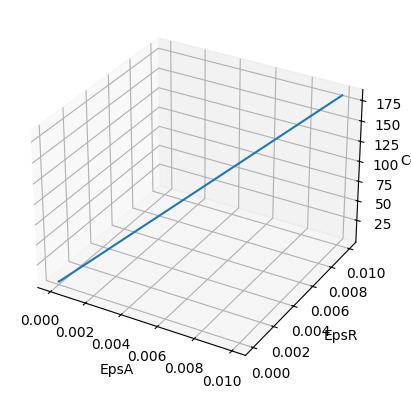

In [243]:
#3D plots

x = EpsA_points
y = EpsR_points
z = Cost_array

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('EpsA')
ax.set_ylabel('EpsR')
ax.set_zlabel('Cost')

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


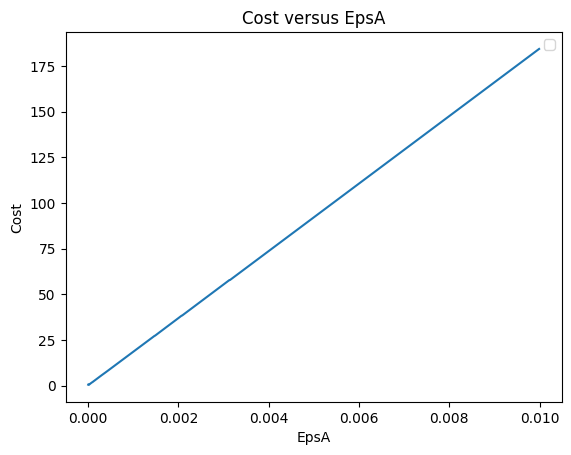

In [244]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsA_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsA')
plt.ylabel('Cost')
plt.title('Cost versus EpsA')

# Add a legend
plt.legend()

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


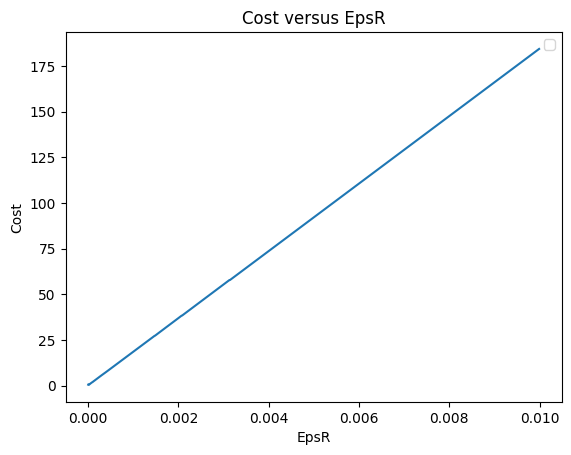

In [245]:
#2D Plots
import matplotlib.pyplot as plt

# Example data
x = EpsR_points
y = Cost_array

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('EpsR')
plt.ylabel('Cost')
plt.title('Cost versus EpsR')

# Add a legend
plt.legend()

# Show the plot
plt.show()

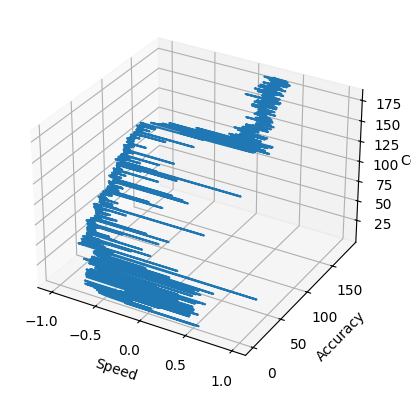

In [246]:
#3D plots

x = speed
y = ERR_array
z = Cost_array

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.plot(x, y, z)

# Set labels
ax.set_xlabel('Speed')
ax.set_ylabel('Accuracy')
ax.set_zlabel('Cost')

# Show the plot
plt.show()

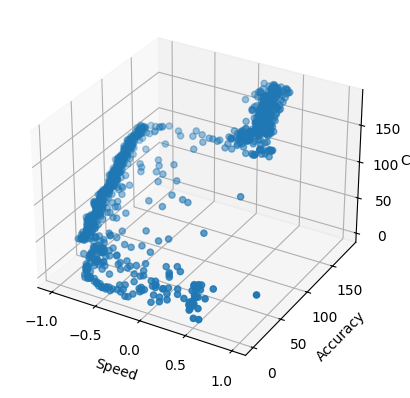

In [249]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x = speed
y = ERR_array
z = Cost_array

# Create a figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Create a 3D scatter plot
ax.scatter(x, y, z)

# Add labels
ax.set_xlabel('Speed')
ax.set_ylabel('Accuracy')
ax.set_zlabel('Cost')

# Show the plot
plt.show()


In [248]:
#SAVING

import json

data = {
    "EpsA_points": EpsA_points,
    "EpsR_points": EpsR_points,
    "ERR_array": ERR_array,
    "t_array": t_array,
    "speed": speed,
    "ERR_array": ERR_array,
    "Cost_array": Cost_array
}

with open('data.json', 'w') as f:
    json.dump(data, f)
